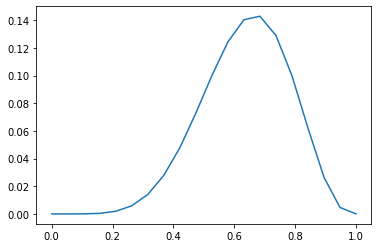

In [33]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
p_grid = np.linspace(0,1,20)
prior = np.repeat(1,20)
likelihood = binom.pmf(6,9,p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior/sum(unstd_posterior)
plt.plot(p_grid, posterior)